In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('/content/LoanDataset---LoansDatasest.csv')
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
columns_to_clean = ['customer_income', 'loan_amnt']
for col in columns_to_clean:
  df[col] = df[col].replace({',':''}, regex=True)
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [35]:
label_encoder = LabelEncoder()

df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['historical_default'] = label_encoder.fit_transform(df['historical_default'])
df['Current_loan_status'] = label_encoder.fit_transform(df['Current_loan_status'])
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,3,123.0,4,2,NaN,16.02,10,1,3,0
1,2.0,21,9600,2,5.0,1,0,NaN,11.14,1,1,2,1
2,3.0,25,9600,0,1.0,3,1,NaN,12.87,5,0,3,0
3,4.0,23,65500,3,4.0,3,1,NaN,15.23,10,0,2,0
4,5.0,24,54400,3,8.0,3,1,NaN,14.27,10,1,4,0


In [36]:
X = df.drop(['customer_id','Current_loan_status'], axis=1)
y = df['Current_loan_status']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [38]:
model_ada = AdaBoostClassifier(n_estimators=50, random_state=42)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [39]:
y_pred = model_ada.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [40]:
accuracy_score(y_test, y_pred)

0.9262043571647744

In [41]:
conf = confusion_matrix(y_test, y_pred)

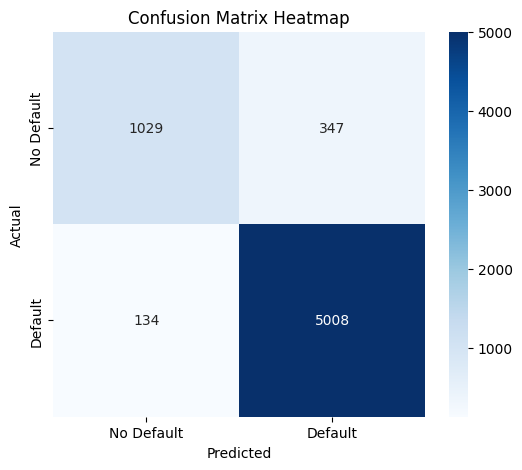

In [54]:
plt.figure(figsize=(6,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()